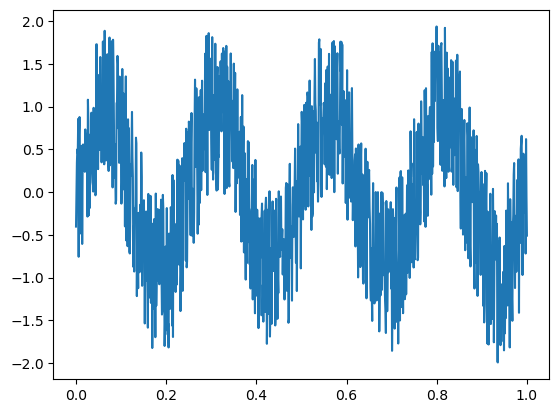

In [35]:
import matplotlib.pyplot as plt
import numpy as np
import scipy
#import tensorflow as tf

X = np.linspace(0, 1, num=1024)
data = np.sin(X * 2 * np.pi * 4) + np.random.uniform(-1, 1, size=1024)
data = data.astype(np.float32)

plt.plot(X, data)

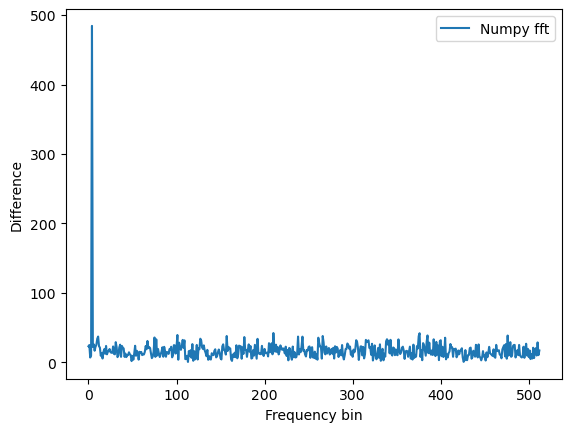

In [36]:
np_fft = np.fft.rfft(data)

plt.plot(np.abs(np_fft), label='Numpy fft')
#plt.yscale('log')
plt.xlabel('Frequency bin')
plt.ylabel('Difference')
plt.legend();

In [37]:
np.argmax(np.abs(np_fft))

4

In [38]:
np_fft[6:] = 0
np_fft[:2] = 0

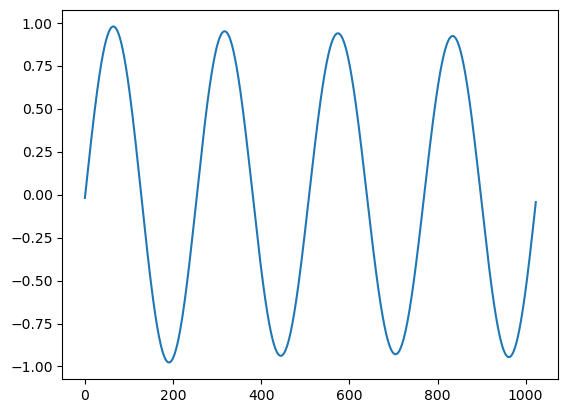

In [39]:
from scipy.fft import irfft

new_sig = irfft(np_fft)

plt.plot(new_sig)
plt.show()

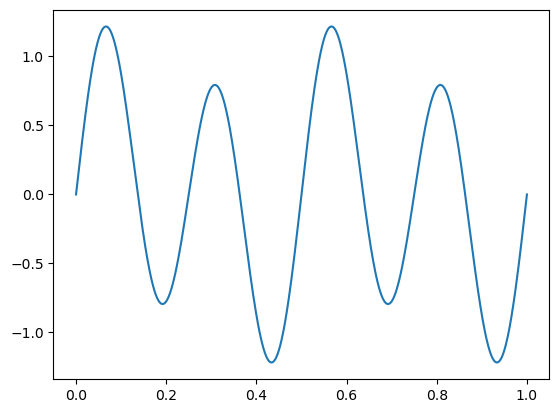

In [50]:

import matplotlib.pyplot as plt
import numpy as np
import scipy
#import tensorflow as tf

X = np.linspace(0, 1, num=1024)
data = np.sin(X * 2 * np.pi * 4) + np.sin(X * 1 * np.pi * 4)*0.3
data = data.astype(np.float32)

plt.plot(X, data)


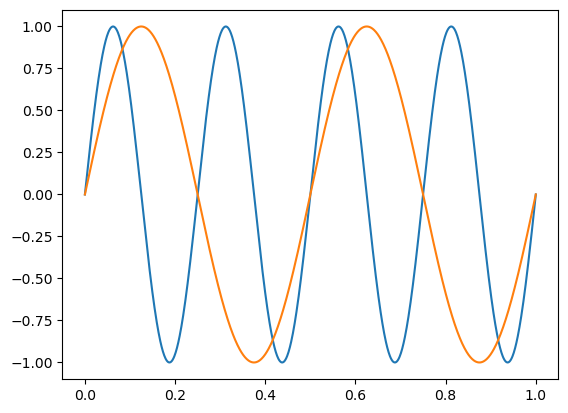

In [51]:

import matplotlib.pyplot as plt
import numpy as np
import scipy
#import tensorflow as tf

X = np.linspace(0, 1, num=1024)
data0 = np.sin(X * 2 * np.pi * 4) #+ np.sin(X * 1 * np.pi * 4)
data0 = data0.astype(np.float32)
data1 = np.sin(X * 1 * np.pi * 4) #+ np.sin(X * 1 * np.pi * 4)
data1 = data1.astype(np.float32)

plt.plot(X, data0);
plt.plot(X, data1);

In [53]:
data[:10]

array([0.        , 0.02825027, 0.05648516, 0.0846893 , 0.11284733,
       0.14094391, 0.16896378, 0.19689165, 0.22471236, 0.25241077],
      dtype=float32)

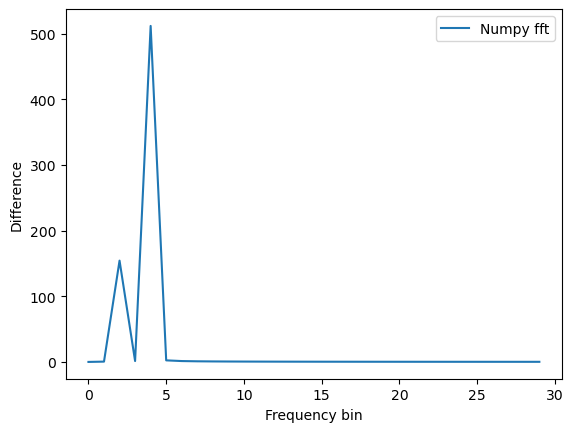

In [52]:
np_fft = np.fft.rfft(data)

plt.plot(np.abs(np_fft)[:30], label='Numpy fft')
#plt.yscale('log')
plt.xlabel('Frequency bin')
plt.ylabel('Difference')
plt.legend();

In [55]:
np.abs(np_fft)[:10]

array([1.12410081e-15, 4.66030752e-01, 1.54189550e+02, 1.34734427e+00,
       5.11536655e+02, 2.37518538e+00, 1.31570429e+00, 9.43590018e-01,
       7.47883341e-01, 6.24910713e-01])

In [64]:
np.abs(np_fft)[4]*0.3

153.4609963901924

In [65]:
np.abs(np_fft)[2]

154.18955000311666

In [59]:
np_fft[3]

(0.012400626305057127-1.3472872066459027j)

In [66]:
np.argmax(np.abs(np_fft))

4

In [67]:
np_fft[4:] = 0

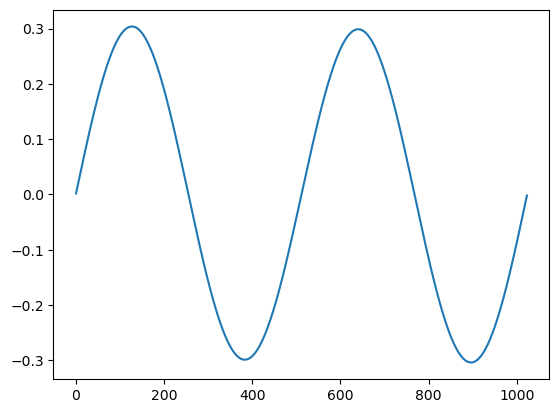

In [68]:
from scipy.fft import irfft

new_sig = irfft(np_fft)

plt.plot(new_sig)
plt.show()

---

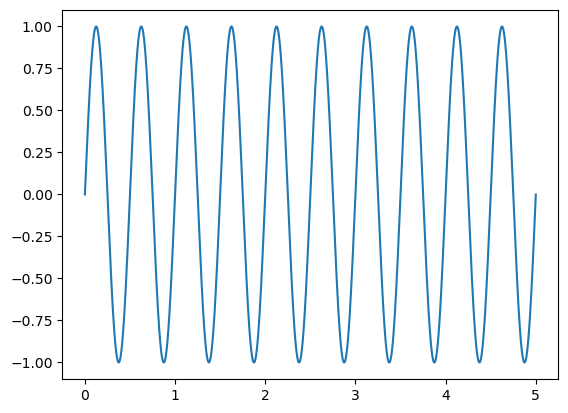

In [69]:
SAMPLE_RATE = 44100  # Гц
DURATION = 5  # Секунды

def generate_sine_wave(freq, sample_rate, duration):
    x = np.linspace(0, duration, sample_rate*duration, endpoint=False)
    frequencies = x * freq
    # 2pi для преобразования в радианы
    y = np.sin((2 * np.pi) * frequencies)
    return x, y

# Генерируем волну с частотой 2 Гц, которая длится 5 секунд
x, y = generate_sine_wave(2, SAMPLE_RATE, DURATION)
plt.plot(x, y)
plt.show()

array([ 0.        ,  0.00028495,  0.0005699 , ..., -0.00085486,
       -0.0005699 , -0.00028495])

In [82]:
_, nice_tone = generate_sine_wave(400, SAMPLE_RATE, DURATION)
_, noise_tone = generate_sine_wave(4000, SAMPLE_RATE, DURATION)

noise_tone = noise_tone * 0.3
mixed_tone = nice_tone + noise_tone

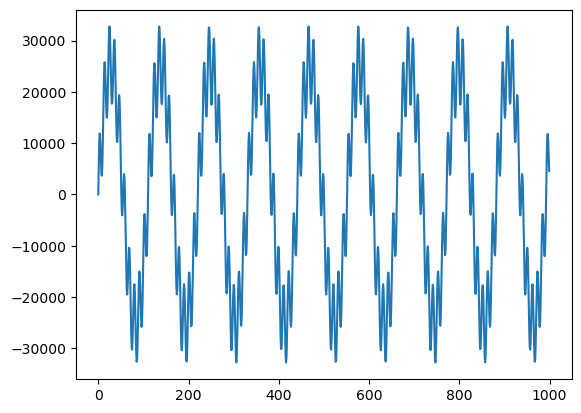

In [84]:
normalized_tone = np.int16((mixed_tone / mixed_tone.max()) * 32767)

plt.plot(normalized_tone[:1000])
plt.show()

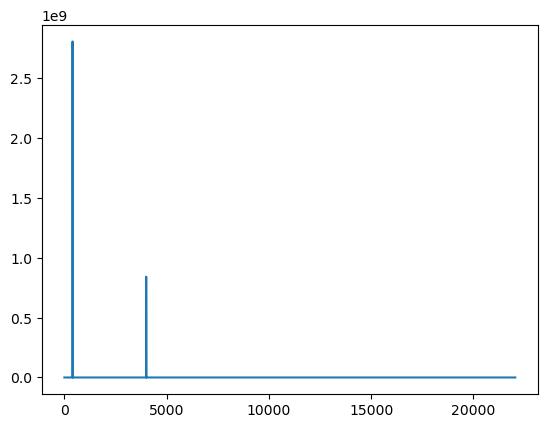

In [92]:
from scipy.fft import rfft, rfftfreq
N = SAMPLE_RATE * DURATION

# обратите внимание на r в начале имён функций
yf = rfft(normalized_tone)
xf = rfftfreq(N, 1/SAMPLE_RATE)

plt.plot(xf, np.abs(yf))
plt.show()

In [94]:
len(np.abs(yf))

110251

In [95]:
len(normalized_tone)

220500

In [12]:
xf

array([0.00000e+00, 2.00000e-01, 4.00000e-01, ..., 2.20496e+04,
       2.20498e+04, 2.20500e+04])

In [75]:
xf[np.argmax(np.abs(yf))]

400.0

In [87]:
np.abs(yf)[3998:4002]

array([  1.        ,   1.00000001, 180.25506889,   1.00000001])

In [88]:
# Максимальная частота составляет половину частоты дискретизации
points_per_freq = len(xf) / (SAMPLE_RATE / 2)

# Наша целевая частота - 4000 Гц
target_idx = int(points_per_freq * 4000)

In [89]:
points_per_freq*4000

20000.18140589569

In [90]:
target_idx

20000

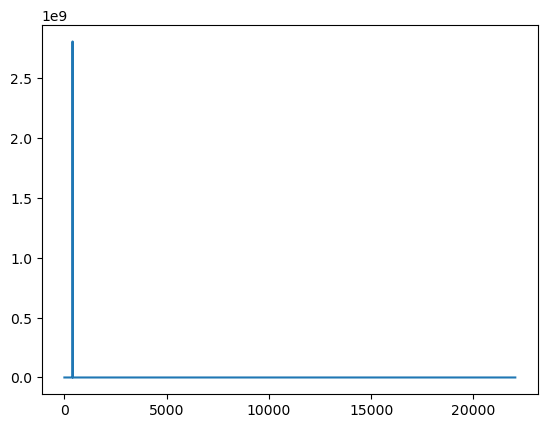

In [78]:
yf[target_idx-2:target_idx+2] = 0

plt.plot(xf, np.abs(yf))
plt.show()

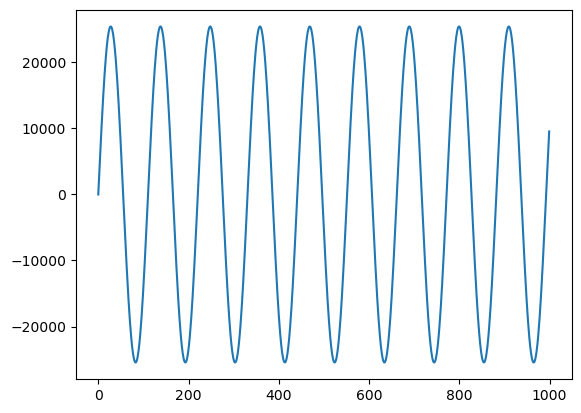

In [79]:
from scipy.fft import irfft

new_sig = irfft(yf)

plt.plot(new_sig[:1000])
plt.show()

In [66]:
#https://www.youtube.com/watch?v=spUNpyF58BY&t=257s - видео с ютюба для закрепления материала.